In [2]:
import numpy as np
from scipy import io
import sys
sys.path.append("..")
from utils import test_train_split, evaluate_model_torch, subtract_spont, corrcoef, PCA,zscore
from sklearn.cluster import KMeans

In [3]:
U=np.load('/home/maria/Documents/EnsemblePursuit/SAND9/experiments/natimg2800_M170717_MP034_2017-09-11.mat_U_ep_pytorch.npy')
V=np.load('/home/maria/Documents/EnsemblePursuit/SAND9/experiments/natimg2800_M170717_MP034_2017-09-11.mat_V_ep_pytorch.npy').T
data = io.loadmat('/home/maria/Documents/EnsemblePursuit/SAND9/data/natimg2800_M170717_MP034_2017-09-11.mat')
resp = data['stim'][0]['resp'][0]
spont =data['stim'][0]['spont'][0]
X=subtract_spont(spont,resp)
X=zscore(X).T

/home/maria/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:138: RuntimeWarning: invalid value encountered in sqrt
  ret = um.sqrt(ret, out=ret)


In [4]:
kmeans = KMeans(n_clusters=150, random_state=0).fit_predict(X)
print(kmeans)


/home/maria/anaconda3/lib/python3.6/site-packages/sklearn/metrics/pairwise.py:257: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


[  5  80  39 ... 110  49  40]


In [5]:
print(kmeans.shape)

(10103,)


In [10]:
print(X[kmeans==149].shape)

(29, 5880)


In [ ]:
U=
for j in range(0,X.shape[0]):
    X_clust=np.zeros((1,150))
    X_clust[]

In [24]:
cluster_means=[]
for j in range(150):
    mean_of_cluster=np.mean(X[kmeans==j,:],axis=0)
    cluster_means.append(mean_of_cluster)
#print(cluster_means)
cluster_means=np.array(cluster_means)
print(cluster_means.shape)

(150, 5880)


Total variance explained, averaged over neurons is: 0.06263488531112671


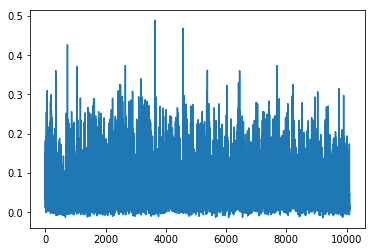

In [36]:
import matplotlib.pyplot as plt
%matplotlib inline
u=[]
v=[]
for j in range(X.shape[0]):
    cluster_index_of_neuron=kmeans[j]
    mean_of_cluster=cluster_means[cluster_index_of_neuron,:]
    u_j=((X[j,:]-mean_of_cluster)**2).sum()
    v_j=((X[j,:]-np.mean(X[j,:]))**2).sum()
    u.append(u_j)
    v.append(v_j)
u=np.array(u)
v=np.array(v)
plt.plot(-np.divide(u,v)+1)
print('Total variance explained, averaged over neurons is:',(1-np.mean(u)/np.mean(v)))

In [41]:
def variance_explained_across_neurons(U,V,X):
        '''
        The coefficient R^2 is defined as (1 - u/v), where u is the residual sum of squares
        ((y_true - y_pred) ** 2).sum() and v is the total sum of squares
        ((y_true - y_true.mean()) ** 2).sum().
        '''
        #Fetch the original data and convert it into the same form as what goes into the
        #matrix factorization model
        3#data = io.loadmat(self.data_path+self.mouse_filename)
        #resp = data['stim'][0]['resp'][0]
        #spont =data['stim'][0]['spont'][0]
        #X=subtract_spont(spont,resp).T
        #X=zscore(X.T).T
        u=[]
        v=[]
        approx=U@V
        for j in range(X.shape[0]):
            u_j=((X[j,:]-approx[j,:])**2).sum()
            v_j=((X[j,:]-np.mean(X[j,:]))**2).sum()
            u.append(u_j)
            v.append(v_j)
        u=np.array(u)
        v=np.array(v)
        plt.plot(-np.divide(u,v)+1)
        plt.title('Variance explained across neurons')
        plt.show()
        print('Total variance explained, averaged over neurons is:',(1-np.mean(u)/np.mean(v)))

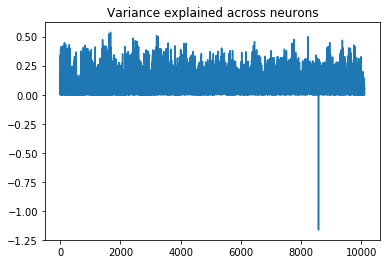

Total variance explained, averaged over neurons is: 0.09808886051177979


In [35]:
variance_explained_across_neurons(U,V,X)

In [43]:
from sklearn.decomposition import PCA
V_PCA = PCA(n_components=150).fit_transform(X)
U_PCA=PCA(n_components=150).fit(X).components_
print(U_PCA.shape)
print(V_PCA.shape)
variance_explained_across_neurons(U_PCA,V_PCA,X)

(150, 5880)
(10103, 150)


ValueError: shapes (150,5880) and (150,10103) not aligned: 5880 (dim 1) != 150 (dim 0)